<a href="https://colab.research.google.com/github/catcodey/feynn-labs/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd


mcdonalds = pd.read_csv('mcdonalds.csv')


print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
# shape
mcdonalds.shape

(1453, 15)

In [5]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:


MCD = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)


column_means = MCD.mean().round(2)

print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from tabulate import tabulate

MD_pca = PCA().fit_transform(MCD)

print("\nProportion of Variance Explained:")
print(tabulate(pd.DataFrame(PCA().fit(MCD).explained_variance_ratio_, columns=["Explained Variance"])))

print("\nSummary of PCA Results:")
print(tabulate(pd.DataFrame(MD_pca, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])]).describe()))


Proportion of Variance Explained:
--  ---------
 0  0.299447
 1  0.192797
 2  0.133045
 3  0.0830958
 4  0.0594805
 5  0.0502996
 6  0.0438491
 7  0.0395478
 8  0.0367609
 9  0.0323533
10  0.0293233
--  ---------

Summary of PCA Results:
-----  -------------  -----------  --------------  -------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------
count  1453           1453         1453            1453           1453            1453            1453            1453            1453            1453            1453
mean     -2.6896e-17     0           -6.78512e-17     4.0344e-17     1.83382e-17    -4.43172e-17     1.61987e-17     1.52818e-17    -5.16525e-17     8.00767e-17    -1.37536e-17
std       0.75705        0.607456     0.504619        0.398799       0.337405        0.310275        0.289697        0.275122        0.265251        0.248842        0.236903
min      -1.18842       -1.04027     -0.880813       -0.590621    

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

MD_pca = PCA().fit_transform(MCD)

rounded_pca_results = pd.DataFrame(np.round(MD_pca, 1), columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])
df_pca_results = pd.DataFrame(rounded_pca_results, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])

print(df_pca_results)




      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0     0.4 -0.2  0.7 -0.4  0.2 -0.4 -0.2  0.2  0.2   0.5  -0.6
1    -0.2  0.4 -0.7 -0.1  0.0 -0.1 -0.1 -0.0  0.1   0.5  -0.5
2     0.4  0.7 -0.1  0.7  0.8 -0.7  0.6  0.4 -0.3   0.1   0.2
3    -0.2 -0.4 -0.8  0.2 -0.7 -0.0 -0.1 -0.2 -0.0  -0.3  -0.1
4     0.2 -0.8  0.0  0.5  0.9 -0.1 -0.5  0.2 -0.1   0.0   0.1
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...
1448  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1  -0.4  -0.5
1449 -1.0  0.0  0.3  0.4 -0.1  0.4 -0.3  0.9 -0.3  -0.2  -0.2
1450 -0.2  1.1  0.2 -0.5 -0.2 -0.2 -0.1 -0.0  0.0   0.1  -0.0
1451 -1.2 -0.0  0.6  0.7  0.0  0.2 -0.0 -0.3  0.0  -0.0  -0.1
1452  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1  -0.4  -0.5

[1453 rows x 11 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


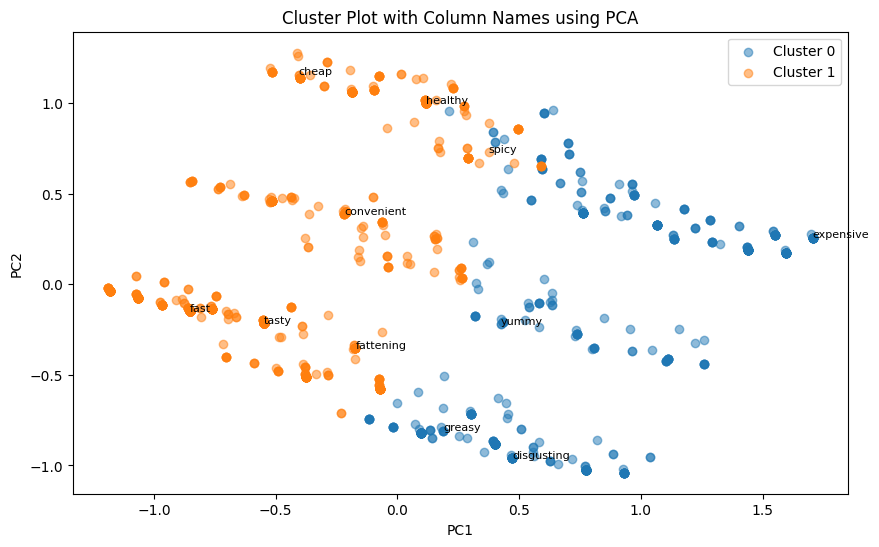

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



MD_pca = PCA().fit_transform(MCD)

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(StandardScaler().fit_transform(MCD))

df_plot = pd.DataFrame(MD_pca, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])
df_plot['Cluster'] = cluster_labels


plt.figure(figsize=(10, 6))
for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)


for i, col_name in enumerate(MCD.columns):
    plt.annotate(col_name, (MD_pca[i, 0], MD_pca[i, 1]), fontsize=8)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Plot with Column Names using PCA')


plt.legend()
plt.show()


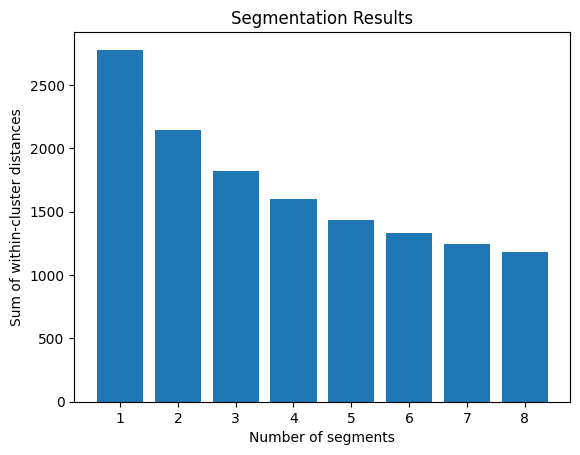

In [13]:

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MCD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

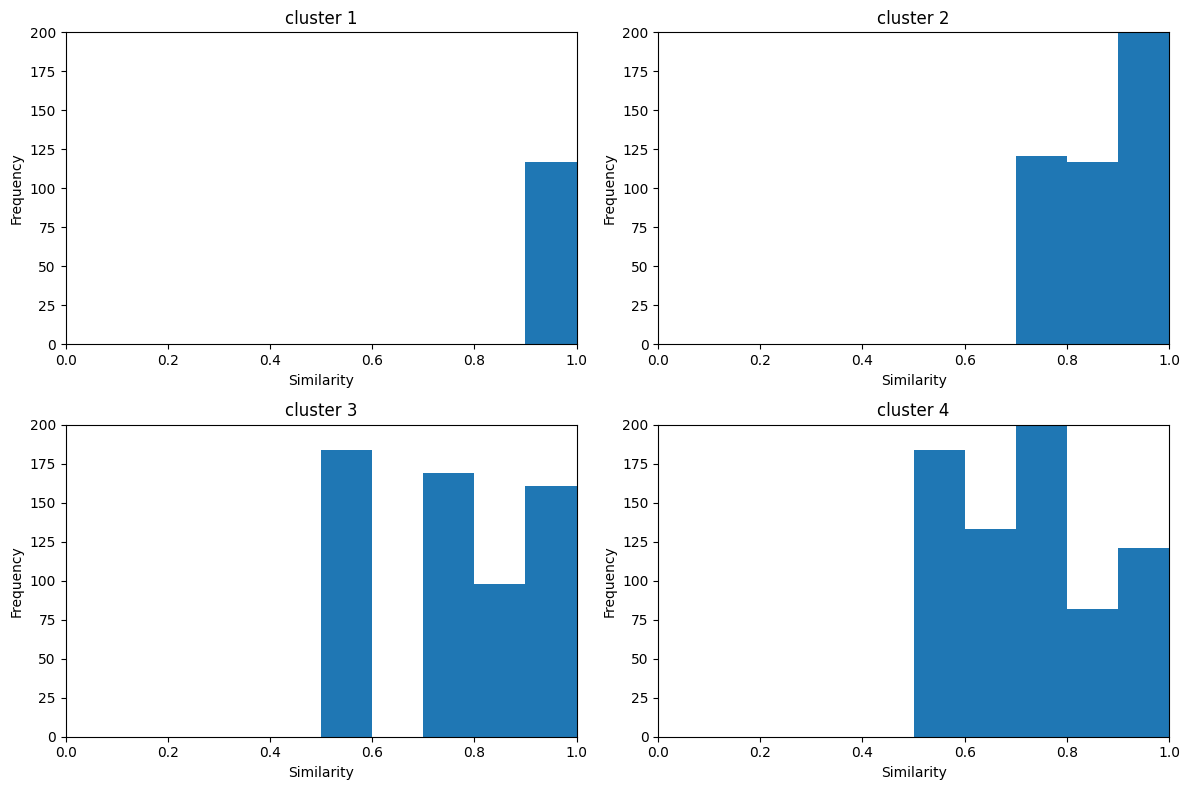

In [15]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MCD)
    similarities = MD_km28[str(i)].transform(MCD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cluster_number = 4
mcdonalds_cluster_4 = mcdonalds[df_plot['Cluster'] == cluster_number]


distances = pairwise_distances(mcdonalds_cluster_4, metric="euclidean")


similarities = 1 - distances / distances.max()


stability = similarities.mean(axis=1)


df_plot_cluster_4 = pd.DataFrame({"Segment Number": range(1, len(stability) + 1), "Segment Stability": stability})


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot_cluster_4, x="Segment Number", y="Segment Stability")
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title(f"Segment Stability for Cluster {cluster_number}")
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by check_pairwise_arrays.

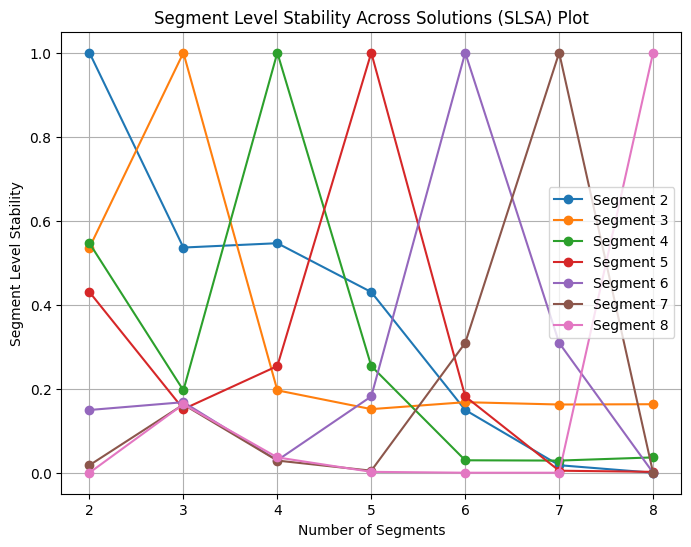

In [17]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MCD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

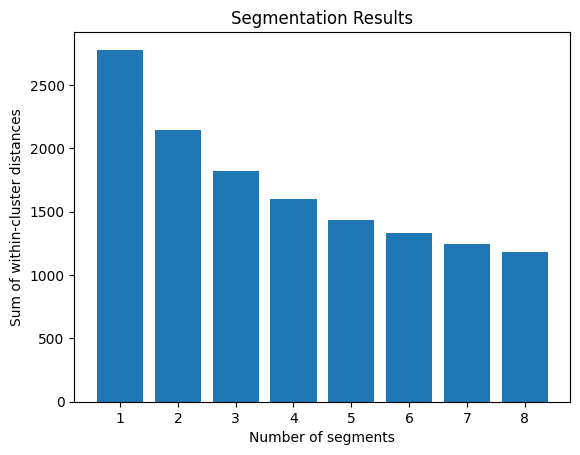

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)

nrep = 10
num_segments = range(1, 9)

within_cluster_distances = []
MD_km28 = {}

for k in num_segments:

    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MCD)

    within_cluster_distances.append(kmeans.inertia_)

    MD_km28[str(k)] = kmeans


plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


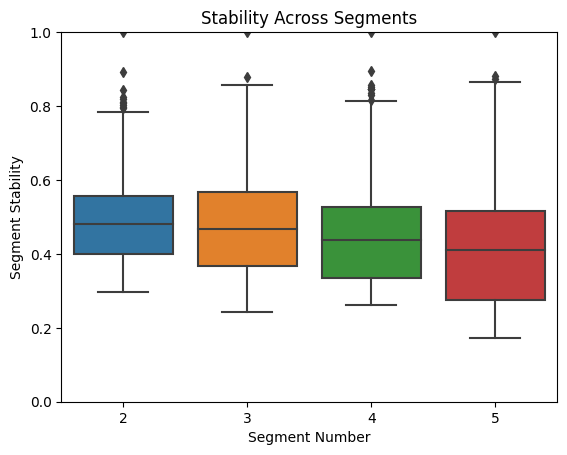

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


segment_solutions = ["2", "3", "4", "5"]

normalized_stability_values = []

for segment_solution in segment_solutions:
    similarities = MD_km28[segment_solution].transform(MCD).min(axis=1)
    normalized_stability = similarities / np.max(similarities)
    normalized_stability_values.append(normalized_stability)

sns.boxplot(data=normalized_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(len(segment_solutions)), segment_solutions)
plt.ylim(0, 1)
plt.title("Stability Across Segments")

plt.show()


In [55]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample

np.random.seed(1234)


nrep = 10
num_clusters_range = range(2, 9)

for k in num_clusters_range:
    gmm = GaussianMixture(n_components=k, n_init=nrep, random_state=1234)
    gmm.fit(MCD)
    print(f"Number of clusters: {k}")
    print(gmm.weights_)
    print(gmm.means_)
    print(gmm.covariances_)
    print("----------------------")


Number of clusters: 2
[0.32209222 0.67790778]
[[0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]
 [0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]]
[[[ 2.01563386e-01  3.52746731e-02  1.79569362e-02 -1.36834319e-02
   -2.05365622e-02 -3.50692161e-02  1.51672876e-02  1.45586785e-01
    4.57484110e-03  4.06074220e-02 -7.22432246e-02]
  [ 3.52746731e-02  2.04343903e-01  8.30046022e-03  2.16140697e-02
    8.07217472e-03  5.30535470e-03  2.62254365e-02  4.47896121e-02
   -2.25728687e-02  9.22273357e-03  1.51124990e-02]
  [ 1.79569362e-02  8.30046022e-03  8.69092840e-02  2.83530572e-03
    7.47863248e-03  6.28698224e-03  7.31426693e-03  1.82856673e-02
    5.01314925e-03  2.17784352e-02  1.08070349e-02]
  [-1.36834319e-02  2.16140697e-02  2.83530572e-03  8.69092840e-02
    5.02136752e-02  2.57642998e-02  9.77975017e-03 -1.18754109e-02
    7.80736358e-0

KeyboardInterrupt: 

In [64]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd




kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MCD)


MD_m4 = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
MD_m4.fit(MCD)
mixture_labels = MD_m4.predict(MCD)

table = pd.crosstab(index=kmeans_labels, columns=mixture_labels, rownames=['kmeans'], colnames=['mixture'])
print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164


In [63]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


k = 4
kmeans_model = KMeans(n_clusters=k, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MCD)

gmm_model = GaussianMixture(n_components=k, random_state=1234)
gmm_clusters = gmm_model.fit_predict(MCD)


results_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})


MD_m4 = MCD[results_df['mixture'] == 3]

k4_m4_model = KMeans(n_clusters=k, random_state=1234)
k4_m4_clusters = k4_m4_model.fit_predict(MD_m4)

results_m4_df = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results_df['kmeans'], results_df['mixture']))
print(pd.crosstab(results_df['kmeans'], results_m4_df['kmeans']))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

k = 4
gmm_model = GaussianMixture(n_components=k, random_state=1234)
gmm_clusters = gmm_model.fit_predict(MCD)

results_df = pd.DataFrame({'kmeans': MD_k4, 'mixture': gmm_clusters})

table = pd.crosstab(index=results_df['kmeans'], columns=results_df['mixture'], rownames=['kmeans'], colnames=['mixture'])
print(table)


mixture     0    1   2    3
kmeans                     
Ellipsis  129  598  74  652


In [65]:
import pandas as pd

mcdonalds_like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

print(mcdonalds_like_counts)


I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [67]:
import pandas as pd

mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()

print(like_n_counts)


2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like_n, dtype: int64


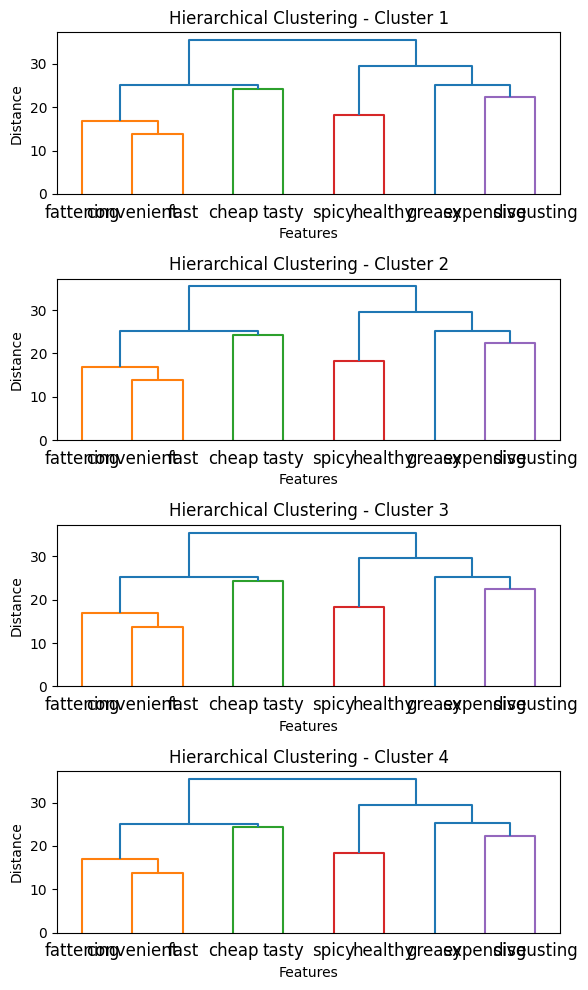

In [85]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt




num_clusters = 4


fig, axes = plt.subplots(nrows=num_clusters, figsize=(6,10))

for i in range(num_clusters):

    columns_for_clustering = MCD.columns[1:]


    distance_matrix = MCD[columns_for_clustering].T

    linkage_matrix = linkage(distance_matrix, method='complete')

    dendrogram(linkage_matrix, labels=columns_for_clustering, orientation='top', ax=axes[i])
    axes[i].set_title(f'Hierarchical Clustering - Cluster {i + 1}')
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

